<a href="https://colab.research.google.com/github/deviayu05/LinearRegression/blob/main/A5_Kelompok_3_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Harga Real Estate menggunakan Algoritma Linear Regression**

## **Load Library & Datasets**

**Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

**Datasets**

In [ ]:
# dataset didownload dari kaggle dengan link https://www.kaggle.com/quantbruce/real-estate-price-prediction
df = pd.read_csv('/content/drive/MyDrive/RealEstate/Real estate.csv')

## **Data Cleaning**

In [ ]:
# menampilkan data
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# hapus variabel yang tidak akan digunakan
# Atributes yang digunakan adalah 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area'

df.drop(['No'],axis=1,inplace=True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
# Menampilkan ukuran sisa column setelah dilakukan penghapusan

print(df.shape)

(414, 7)


In [ ]:
# Mengganti nama column pertama
# Dependent variabel(y) adalah price
# Independent variabel(x) adalah transaction_date,	building_age,	MRT_distance,	stores	latitude,	longitude

df.rename(
    columns=({'X1 transaction date':'transaction_date','X2 house age':'building_age', 'X3 distance to the nearest MRT station':'MRT_distance',
              'X4 number of convenience stores':'stores','X5 latitude':'latitude','X6 longitude':'longitude','Y house price of unit area':'price'}),
          inplace=True
)
df

,transaction_date,building_age,MRT_distance,stores,latitude,longitude,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5




**Notes :**

*   transaction_date : tahun transaksi dan kode bulan
*   building_age : umur bangunan/rumah
*   MRT_distance : jarak menuju ke stasiun MRT (m)
*   stores : jumlah toko
*   latitude : garis lintang
*   longitude : garis bujur
*   prices : harga real estate per unit (USD)



In [ ]:
# Dapat dilihat bahwa pada data tersebut tidak memiliki missing values
df.isnull().sum()

transaction_date    0
building_age        0
MRT_distance        0
stores              0
latitude            0
longitude           0
price               0
dtype: int64

In [ ]:
#1.) Mengekstrak info dari kolom "transaction_date". Seperti Tahun, Kuartal.
#2.) Kolom tanggal transaksi memiliki 2 bagian Tahun.Kode Bulan
#3.) Setiap bulan sama dengan 83,33 unit tambahan untuk bulan sebelumnya.
#4.) Misalnya-> 2013.250 berarti -> Tahun adalah 2013 dan bulan adalah 250/83,33 (yaitu ke-3)

# Menampilkan list [year,month_code].
year_mon = df['transaction_date'].apply(lambda x:str(x).split(".")) #typecasting each value to str and splliting
years = [int(year[0]) for year in year_mon] #years
months = [int(year[1]) for year in year_mon] #months code

# Membuat column baru untuk year and months
df['transaction_year'] = years
df['transaction_month'] = months

# Beberapa nilai dalam daftar bulan misalnya: - 500 diformat otomatis menjadi 5. Angka 0 yang tertinggal telah dihapus.
df['transaction_month'] = df['transaction_month'].apply(lambda x:x*100 if x<10 else x)
df['transaction_month'] = df['transaction_month'].apply(lambda x:x*10 if x<100 else x)

# Misal akan dibagi menjadi 4 quarter
# Membuat fungsi untuk mengonversi kode bulan ke Quarter. Misalnya:- (250->Q1, 500->Q2..)
def quarter_conv(month):
    if month <= 250:
        return "Q1"
    elif month <= 500:
        return "Q2"
    elif month <= 750:
        return "Q3"
    elif month <= 1000:
        return "Q4"

df['transaction_qtr'] = df['transaction_month'].apply(quarter_conv)
qtrs = df['transaction_qtr']

df.head()

,transaction_date,building_age,MRT_distance,stores,latitude,longitude,price,transaction_year,transaction_month,transaction_qtr
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,917,Q4
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,917,Q4
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,583,Q3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,500,Q2
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,833,Q4


In [ ]:
df = df.drop(['transaction_date', "transaction_month"],axis=1)
df.head()

,building_age,MRT_distance,stores,latitude,longitude,price,transaction_year,transaction_qtr
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,Q4
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,Q4
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,Q3
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,Q2
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,Q4


In [ ]:
df.dtypes

building_age        float64
MRT_distance        float64
stores                int64
latitude            float64
longitude           float64
price               float64
transaction_year      int64
transaction_qtr      object
dtype: object

In [ ]:
# Karena tipe data transaction_qtr adalah object, maka sesuai aturan ML kita akan mengubahnya menjadi tipe data int/float
# Menggunakan dummy encoding

df = pd.get_dummies(df,drop_first=True)
df.head()

,building_age,MRT_distance,stores,latitude,longitude,price,transaction_year,transaction_qtr_Q2,transaction_qtr_Q3,transaction_qtr_Q4
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,0,0,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,0,0,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,0,1,0
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,1,0,0
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,0,0,1


## **Exploratory Data Analysis**

In [ ]:
# Menampilkan 5 data diawal
df.head()

,building_age,MRT_distance,stores,latitude,longitude,price,transaction_year,transaction_qtr_Q2,transaction_qtr_Q3,transaction_qtr_Q4
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,0,0,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,0,0,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,0,1,0
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,1,0,0
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,0,0,1


In [ ]:
# Menampilkan 5 data diakhir
df.tail()

,building_age,MRT_distance,stores,latitude,longitude,price,transaction_year,transaction_qtr_Q2,transaction_qtr_Q3,transaction_qtr_Q4
409,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,0,0,0
410,5.6,90.45606,9,24.97433,121.54310,50.0,2012,0,1,0
411,18.8,390.96960,7,24.97923,121.53986,40.6,2013,0,0,0
412,8.1,104.81010,5,24.96674,121.54067,52.5,2013,0,0,0
413,6.5,90.45606,9,24.97433,121.54310,63.9,2013,1,0,0


In [ ]:
# Melihat informasi data
# dapat dilihat bahwa seluruh data sudah dalam bentuk numerik
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   building_age        414 non-null    float64
 1   MRT_distance        414 non-null    float64
 2   stores              414 non-null    int64  
 3   latitude            414 non-null    float64
 4   longitude           414 non-null    float64
 5   price               414 non-null    float64
 6   transaction_year    414 non-null    int64  
 7   transaction_qtr_Q2  414 non-null    uint8  
 8   transaction_qtr_Q3  414 non-null    uint8  
 9   transaction_qtr_Q4  414 non-null    uint8  
dtypes: float64(5), int64(2), uint8(3)
memory usage: 24.0 KB


In [ ]:
# Menampilkan kalkulasi dari data statistic
df.describe()

,building_age,MRT_distance,stores,latitude,longitude,price,transaction_year,transaction_qtr_Q2,transaction_qtr_Q3,transaction_qtr_Q4
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,2012.695652,0.323671,0.193237,0.277778
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.460687,0.468442,0.395315,0.448445
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,2012.000000,0.000000,0.000000,0.000000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,2012.000000,0.000000,0.000000,0.000000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,2013.000000,0.000000,0.000000,0.000000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,2013.000000,1.000000,0.000000,1.000000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000,1.000000,1.000000,1.000000


**Summary :**


*   Rata-rata rumah dibangun sejak 17 tahun yang lalu dengan bangunan tertua mencapai umur sekitar 43 tahun.
*   Rata-rata jarak bangunan menuju stasiun MRT terdekat yaitu sejauh kurang lebih 1 km, dengan jarak terdekat 23 meter hingga jarak terjauh mencapai kurang lebih 6 km.
*   Rata-rata harga rumah per satuan luas sekitar 38 juta USD dengan harga terendah adalah 7.6 juta USD dan harga tertinggi mencapai 117.5 juta USD.



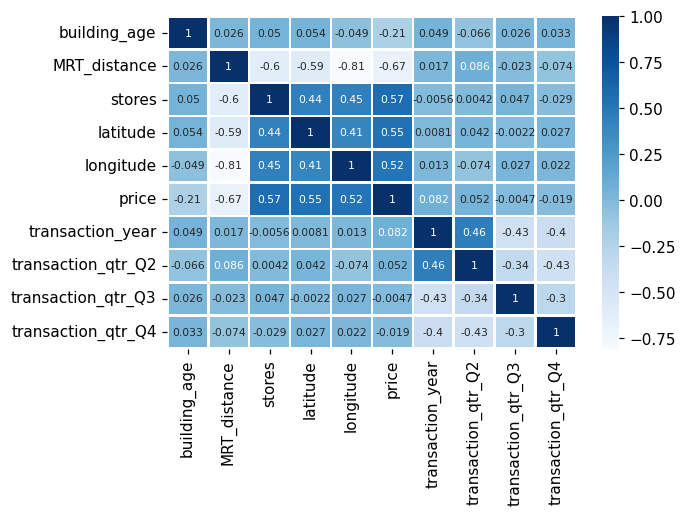

In [ ]:
# Mengetahui nilai korelasi dari independent variable dan dependent variabel

plt.figure(dpi=110)
sns.heatmap(df.corr(), linewidths=1,cmap="Blues",annot=True, annot_kws={'size':7})

<Figure size 720x576 with 0 Axes>

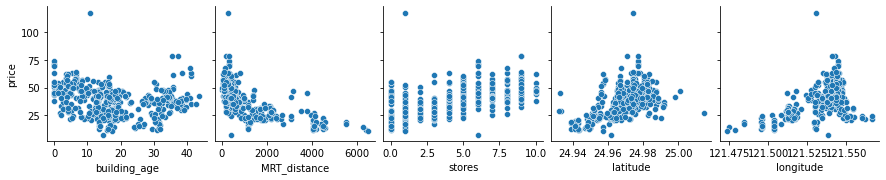

In [ ]:
# Bivariate analysis antara independent variable dan dependent variable
# Melihat hubungan antara independent variable dan dependent variable

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['building_age','MRT_distance','stores','latitude','longitude'],
             y_vars=['price'])
plt.show()

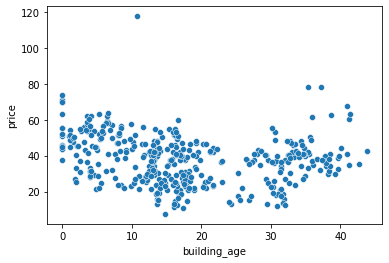

In [ ]:
# Univariate analysis building_age
# Melihat distribusi dari building_age

sns.scatterplot(data=df, x='building_age',y='price')


In [ ]:
# Karena data di atas terdapat outlier, maka kita akan mengahpusnya terlebih dahulu

df[(df['price'] >100) & (df['building_age']<20)]

df = df.drop(270)

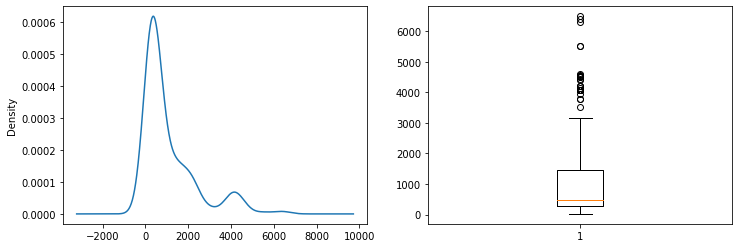

In [ ]:
# Univariate analysis jarak bangunan menuju stasiun MRT terdekat
# Melihat distribusi dari jarak bangunan menuju stasiun MRT terdekat

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['MRT_distance'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['MRT_distance'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


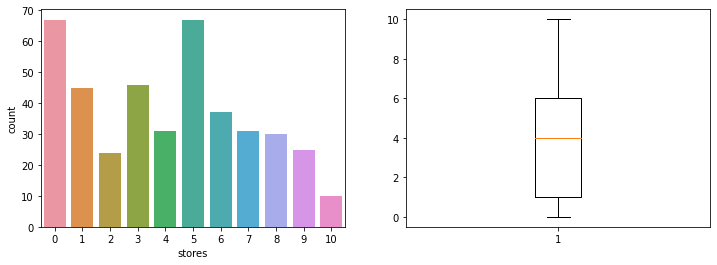

In [ ]:
# Univariate analysis jumlah toko yang tersedia di area real estate
# Melihat distribusi dari jumlah toko yang tersedia di area real estate

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['stores'])

f.add_subplot(1,2,2)
plt.boxplot(df['stores'])
plt.show()

# Sebagian besar data real estate tersebut memiliki jumlah toko 5 atau tidak sama sekali
# Data menyebar secara merata (tidak ada outliers)

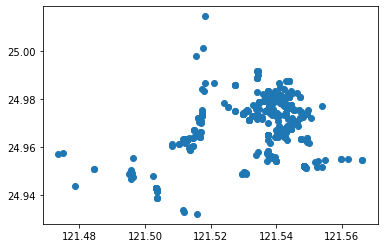

In [ ]:
plt.scatter(x=df['longitude'], y=df['latitude'])
plt.show()

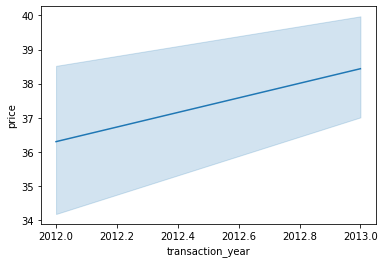

In [ ]:
# Transaksi per tahun terhadap harga

sns.lineplot(x=df['transaction_year'], y=df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


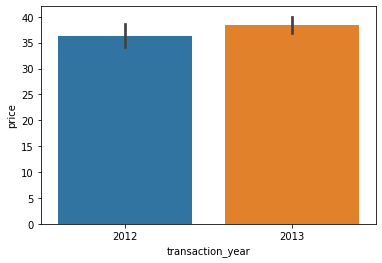

In [ ]:
sns.barplot( df['transaction_year'],df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


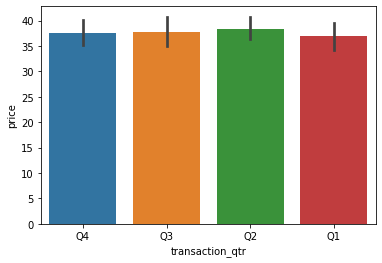

In [ ]:
sns.barplot( qtrs,df['price'])

In [ ]:
df.corr()['price'].sort_values()

MRT_distance         -0.694009
building_age         -0.210985
transaction_qtr_Q4   -0.010563
transaction_qtr_Q3    0.002298
transaction_qtr_Q2    0.033383
transaction_year      0.075405
longitude             0.549250
latitude              0.563954
stores                0.612635
price                 1.000000
Name: price, dtype: float64

## **Modelling**

In [ ]:
#recall data
df.head()

,building_age,MRT_distance,stores,latitude,longitude,price,transaction_year,transaction_qtr_Q2,transaction_qtr_Q3,transaction_qtr_Q4
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,0,0,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,0,0,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,0,1,0
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,1,0,0
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,0,0,1


In [ ]:
# Buat variable x dan y.

X = df.drop('price', axis=1)
y = df['price']

In [ ]:
# Split menjadi data training dan data testing dengan porsi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [ ]:
# Cek shape data training dan testing

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(289, 9)
(124, 9)
(289,)
(124,)


In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Mencari nilai slope/koefisien (m)
# Mencari intercept (b)
print(linear_model.intercept_)
print(linear_model.coef_)

-14330.671246228127
[-2.79203739e-01 -3.90481197e-03  1.12946300e+00  2.67370703e+02
  1.59754556e+01  2.85937506e+00  6.79772925e-01  1.41132795e+00
  5.96429754e-01]


In [ ]:
# Masukkan dalam bentuk data frame agar lebih rapi

coef_dict = {
    'atributes' : X.columns,
    'coef_value' : linear_model.coef_
}
coef = pd.DataFrame(coef_dict, columns=['atributes', 'coef_value'])
coef

,atributes,coef_value
0,building_age,-0.279204
1,MRT_distance,-0.003905
2,stores,1.129463
3,latitude,267.370703
4,longitude,15.975456
5,transaction_year,2.859375
6,transaction_qtr_Q2,0.679773
7,transaction_qtr_Q3,1.411328
8,transaction_qtr_Q4,0.596430


In [ ]:
# Prediction Data Training

y_pred_train = linear_model.predict(X_train)

In [ ]:
pd.DataFrame({'Y_train':y_train, 'Y_pred':y_pred_train})

,Y_train,Y_pred
24,38.8,35.663861
266,23.7,33.488794
299,46.1,47.862865
275,49.7,48.508837
356,45.3,39.274143
...,...,...
63,55.0,47.586203
327,36.7,44.881328
338,36.3,40.950477
11,58.1,53.094046


In [ ]:
# Prediction Data Testing

y_pred_test = linear_model.predict(X_test)

In [ ]:
pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred_test})

,Y_test,Y_pred
176,19.2,12.729646
348,53.7,47.016186
308,53.0,47.044516
300,36.9,46.146148
392,35.3,39.330707
...,...,...
130,37.5,44.698459
16,70.1,50.849147
31,25.0,41.673896
36,22.9,29.442152


In [ ]:
# Accuracy score dari model menggunakan testing data yang sudah displit
linear_model.score(X_test, y_test)

0.6140546904924449

Dari model diatas maka didapatkan akurasi sebesar 61,4%

# **Evaluating**

In [ ]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
print(MAE_train)

RMSE_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
print(RMSE_train)

R2_train = r2_score(y_train,y_pred_train)
print(R2_train)

5.973349118064101
8.007169385454365
0.6291284989213863


In [ ]:
MAE_test = mean_absolute_error(y_test, y_pred_test)
print(MAE_test)

RMSE_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
print(RMSE_test)

R2_test = r2_score(y_test,y_pred_test)
print(R2_test)

5.906340746430447
7.9137636186563105
0.6140546904924449
